In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cross_entropy(Y_true, predictions):
  filter_true_1 = Y_true == 1
  return -1 * ( np.sum(np.log(predictions[filter_true_1])) + np.sum(np.log(1 - predictions[~filter_true_1])) )

In [ ]:
def gradient_descent_step(df, x, step_size):
  return x - step_size * df(x)

def gradient_descent(f, df, x0, step_size, numer_of_steps, treshold=None, should_trace_steps=None, should_plot=False):
  x = x0
  
  if (should_trace_steps is not None):
    print(f'Step 0. Starting point is {x0} and initial function value is {f(x0)}')
  
  if (should_plot):
    steps_hist = [0]
    f_hist = [f(x0)]

  for step in range(numer_of_steps):
    x_new = gradient_descent_step(df, x, step_size)
    f_new = f(x_new)
    if (should_trace_steps is not None):
      if ((step+1) % should_trace_steps == 0):
        print(f'Step {step+1}. At {x_new} function value is {f_new}')
    
    if (should_plot):
      steps_hist.append(step+1)
      f_hist.append(f_new)
    
    if (treshold is not None):
      change = np.abs(f_new - f(x))
      if (change < treshold):
        print(f'Early stop after {step+1} steps because change in step {change} is smaller than treshold {treshold}')
        x = x_new 
        break
   
    x = x_new 


  if (should_trace_steps is not None):
    print(f'Loop finished with trained parameters at {x} and function value is {f(x)}')
  
  if (should_plot):
    plt.figure(figsize=(20,10))
    plt.plot(steps_hist, f_hist);
    plt.title('Cost fuction history');

  return x

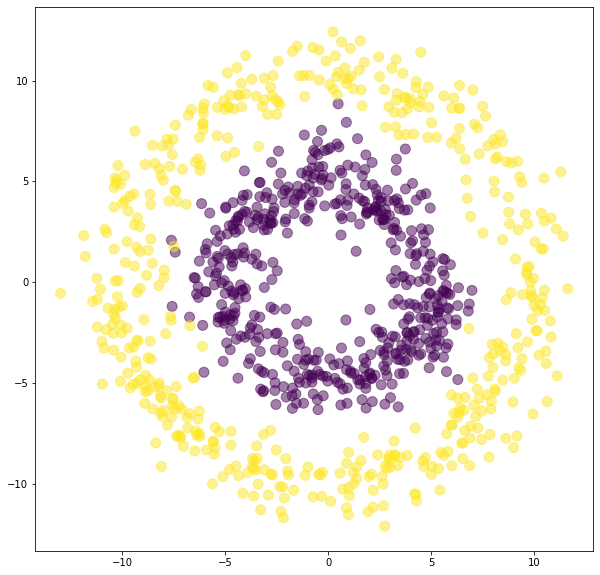

In [ ]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

half = N//2
Y = np.array([0]*half + [1]*(N-half))

radius = 2 * np.pi * np.random.random(size=N)
r = np.random.randn(N)
r[:half] += R_inner
r[half:] += R_outer

donut = np.vstack([r * np.cos(radius), r * np.sin(radius)]).T

plt.figure(figsize=(10,10))
plt.scatter(donut[:,0], donut[:,1], c=Y, s=100, alpha=0.5);

In [ ]:
radius = []
for r in donut:
  radius.append(np.sqrt(r.dot(r)))

r = np.array(radius).reshape(-1,1)

Xb = np.hstack([np.ones((N,1)), r, donut])

w0 = np.random.rand(D+2)

# No regularization

Initial value for trained weigths: [0.70502114 0.88313039 0.34004735 0.62790602]
Step 0. Starting point is [0.70502114 0.88313039 0.34004735 0.62790602] and initial function value is 2.6599645102545106
Step 1000. At [-6.14361408  0.85222087 -0.01321052 -0.01808749] function value is 0.15631520534370674
Step 2000. At [-8.43072742  1.14769169 -0.01416756 -0.02271208] function value is 0.10150365586651333
Step 3000. At [-9.85679921  1.3326665  -0.01538975 -0.02631223] function value is 0.08060289150043955
Step 4000. At [-10.90736784   1.4692207   -0.01656145  -0.02931754] function value is 0.06931912848596009
Step 5000. At [-11.74506868   1.57826139  -0.01763501  -0.03192602] function value is 0.06215988001561187
Loop finished with trained parameters at [-11.74506868   1.57826139  -0.01763501  -0.03192602] and function value is 0.06215988001561187
Final W weights calculated by gradient descent: [-11.74506868   1.57826139  -0.01763501  -0.03192602]
Cross Enthropy loss for W weights calcula

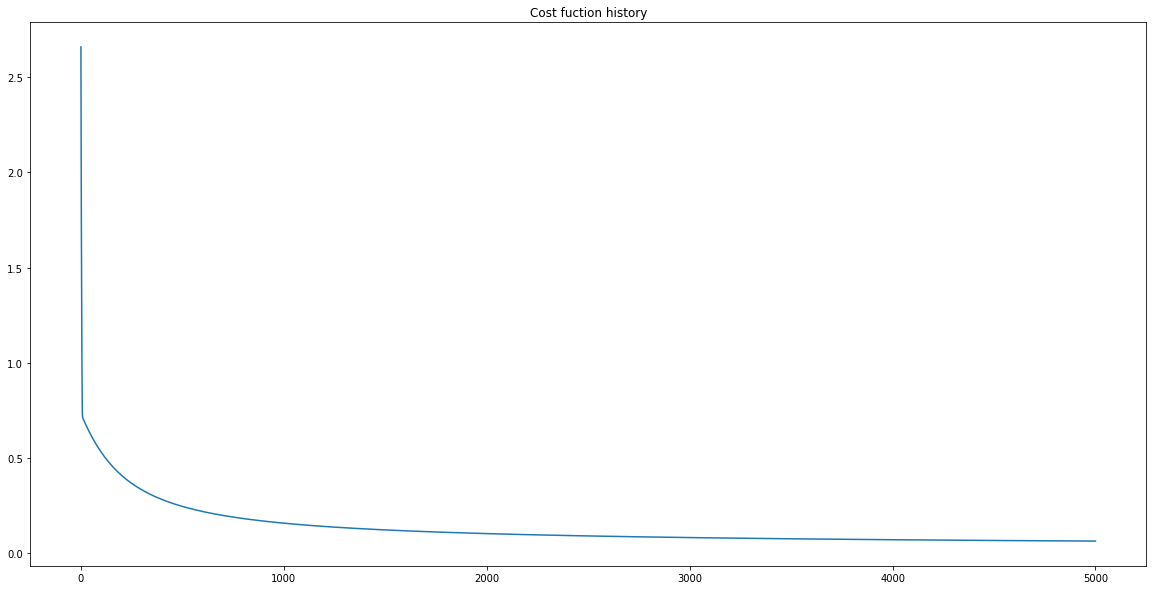

In [ ]:
alfa = 0.0

cost = lambda  w: cross_entropy(Y, sigmoid(Xb.dot(w))) / len(Y) 
dcost = lambda  w: -1 * Xb.T.dot(Y - sigmoid(Xb.dot(w))) / len(Y) 

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=5000, treshold=None, should_trace_steps=1000, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Final W weights calculated by gradient descent:', w_gd)
print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)

# L2 Regularization

Initial value for trained weigths: [0.70502114 0.88313039 0.34004735 0.62790602]
Step 0. Starting point is [0.70502114 0.88313039 0.34004735 0.62790602] and initial function value is 2.6617513825222687
Step 500. At [-3.92628374  0.56803278 -0.01349835 -0.01493938] function value is 0.2694116354947292
Step 1000. At [-5.66584978  0.79072851 -0.01316418 -0.01729291] function value is 0.20537369613226783
Step 1500. At [-6.61159161  0.91250948 -0.01329294 -0.0189134 ] function value is 0.1867835576968998
Step 2000. At [-7.1964207   0.98799412 -0.013483   -0.0200356 ] function value is 0.179719319763613
Step 2500. At [-7.58104249  1.03770045 -0.0136539  -0.02082387] function value is 0.17667280357606097
Step 3000. At [-7.8428776   1.07156448 -0.01379093 -0.02138337] function value is 0.17526319720650563
Step 3500. At [-8.02493411  1.09512218 -0.01389601 -0.02178335] function value is 0.17458236727386323
Step 4000. At [-8.15326437  1.1117334  -0.01397488 -0.02207069] function value is 0.17424

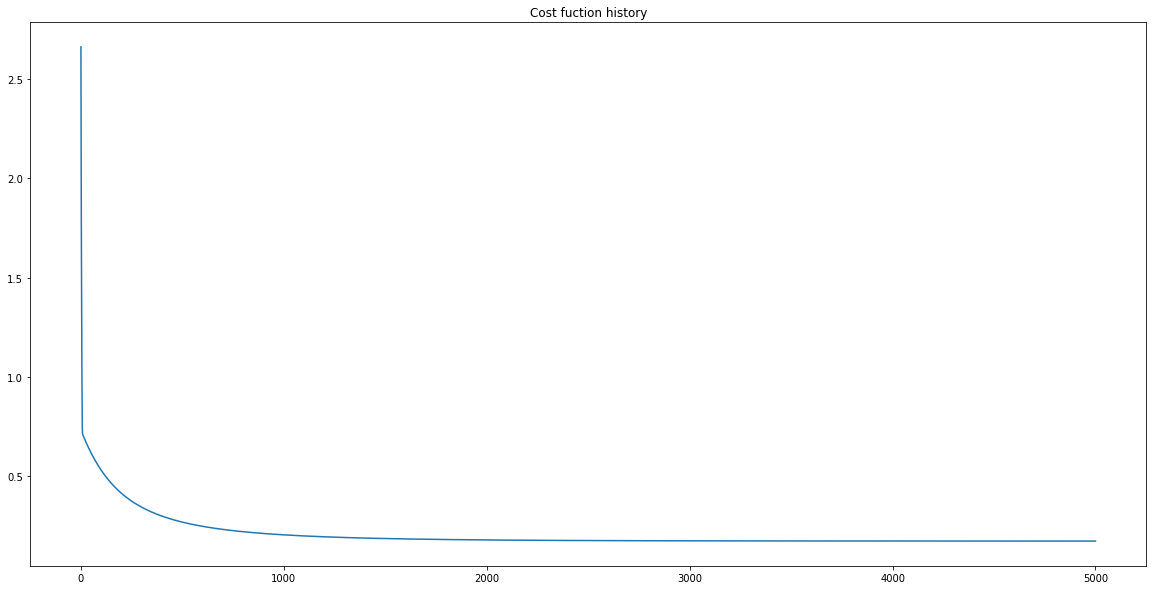

In [ ]:
alfa = 0.001

cost = lambda  w: cross_entropy(Y, sigmoid(Xb.dot(w))) / len(Y) + alfa * w.dot(w)
dcost = lambda  w: -1 * Xb.T.dot(Y - sigmoid(Xb.dot(w))) / len(Y) + 2 * alfa * w

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=5000, treshold=None, should_trace_steps=500, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Final W weights calculated by gradient descent:', w_gd)
print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)

# L1 Regularization

Initial value for trained weigths: [0.70502114 0.88313039 0.34004735 0.62790602]
Final W weights calculated by gradient descent: [-11.16840155   1.50244384  -0.01520327  -0.02832647]
Cross Enthropy loss for W weights calculated by gradient descent: 66.93848197843016


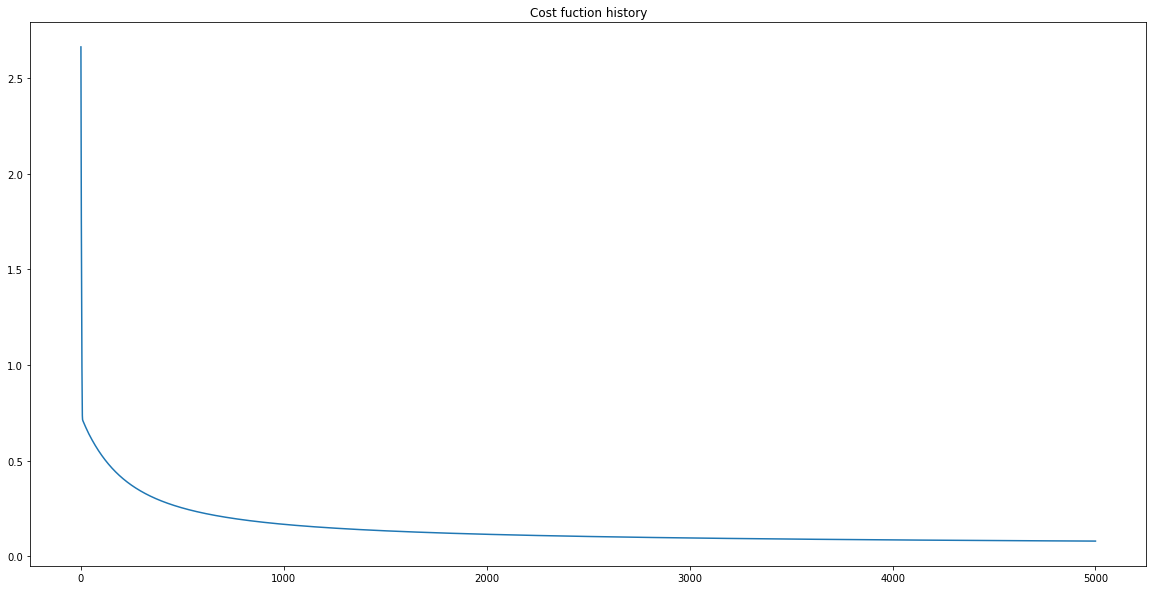

In [ ]:
alfa = 0.001

cost = lambda  w: cross_entropy(Y, sigmoid(Xb.dot(w))) / len(Y) + alfa * (np.abs(w)).sum()
dcost = lambda  w: -1 * Xb.T.dot(Y - sigmoid(Xb.dot(w))) / len(Y) + 2 * alfa * np.sign(w)

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=5000, treshold=None, should_trace_steps=None, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Final W weights calculated by gradient descent:', w_gd)
print('Cross Enthropy loss for W weights calculated by gradient descent:', L_gd)
plt.show()